# Diamonds: Analysis & Price Prediction

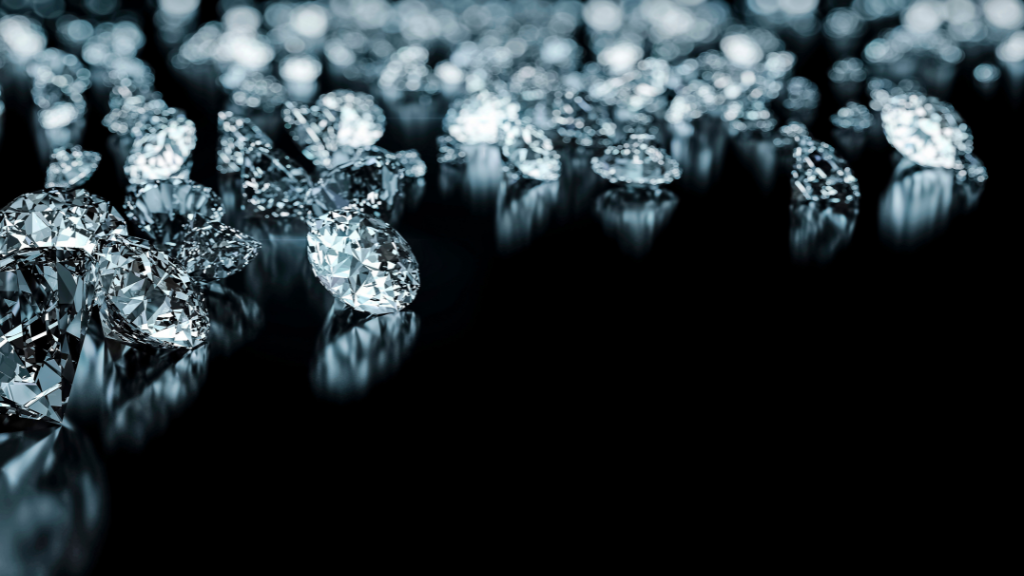

## Introduction

This Dataset represents a range of diamonds with different features such as size, and clarity.  
The project aims to predict the price of diamonds based on various features such as carat, cut, color, clarity, and dimensions.  
*Linear Regression* and *Random Forest* models were used for the predictions.


**Dataset Description**

- `carat`: diamond weight in carat
- `cut`: diamond cutting quality
- `color`: diamond color from J (worst) to D (best)
- `clarity`: A measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
- `x`: diamond length in mm
- `y`: diamond width in mm
- `z`: diamond depth in mm
- `depth`: percentage depth that is equal to z / mean(x,y)
- `table`: the width of the widest point at the top of the diamond
- `price`: diamond price [target variable]

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

df = pd.read_csv('diamonds.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# features of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [4]:
# first 5 rows of dataset

df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [5]:
# last 5 rows of dataset

df.tail()

carat        cut color clarity  depth  table  price     x     y     z
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

In [6]:
# summary statistics of numeric columns

df.describe()

carat         depth         table         price             x  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.799444     61.753006     57.457830   3944.805440      5.734403   
std        0.475173      1.431088      2.232092   3997.938105      1.123077   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2410.000000      5.700000   
75%        1.040000     62.500000     59.000000   5351.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  50000.000000  50000.000000  
mean       5.737956      3.541056  
std        1.145579      0.707065  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [7]:
# checking for number of duplicate rows

df.duplicated().sum()

126

In [8]:
# viewing a few of the duplicate rows

df[df.duplicated(keep=False)].head(15)

carat        cut color clarity  depth  table  price     x     y     z
917    0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
918    0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
919    0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
920    0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
921    0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1870   1.52       Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
1871   1.52       Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
2021   1.00       Fair     E     SI2   67.0   53.0   3136  6.19  6.13  4.13
2022   1.00       Fair     E     SI2   67.0   53.0   3136  6.19  6.13  4.13
2610   1.00       Fair     F     SI2   65.1   55.0   3265  6.26  6.23  4.07
2611   1.00       Fair     F     SI2   65.1   55.0   3265  6.26  6.23  4.07
2915   0.90  Very Good     I     VS2   58.4   62.0   3334  6.29  6.35  3.69
2916   0.90  Very Good     I     VS2   58.4   62.0   3334  6.29  6.35  3.69
3662   1.00       Fair     H     SI1   65.5   57.0   3511  6.26  6.21  4.08
3663   1.00       Fair     H     SI1   65.5   57.0   3511  6.26  6.21  4.08

In [9]:
# null entries per column

df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
# distinct values in cut column

df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [11]:
# distinct values in color column

df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
# distinct values in clarity column

df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [13]:
# cost of most expensive diamond(s) 

df['price'].max()

18823

In [14]:
# cost of least expensive diamond(s) 

df['price'].min()

326

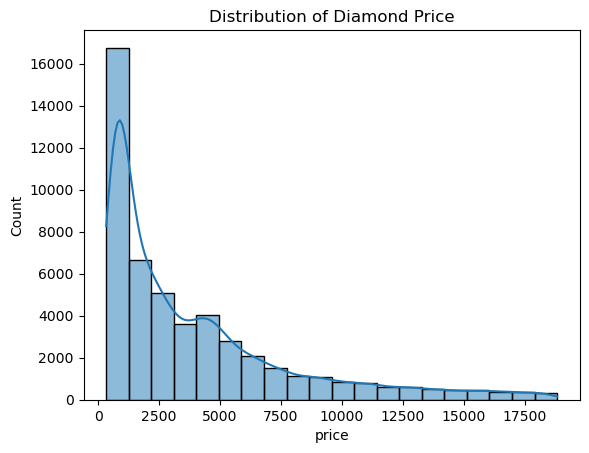

In [15]:
# visualizing distribution of diamond price

sns.histplot(x = 'price', bins = 20, kde=True, data = df)
plt.title('Distribution of Diamond Price')
plt.show()

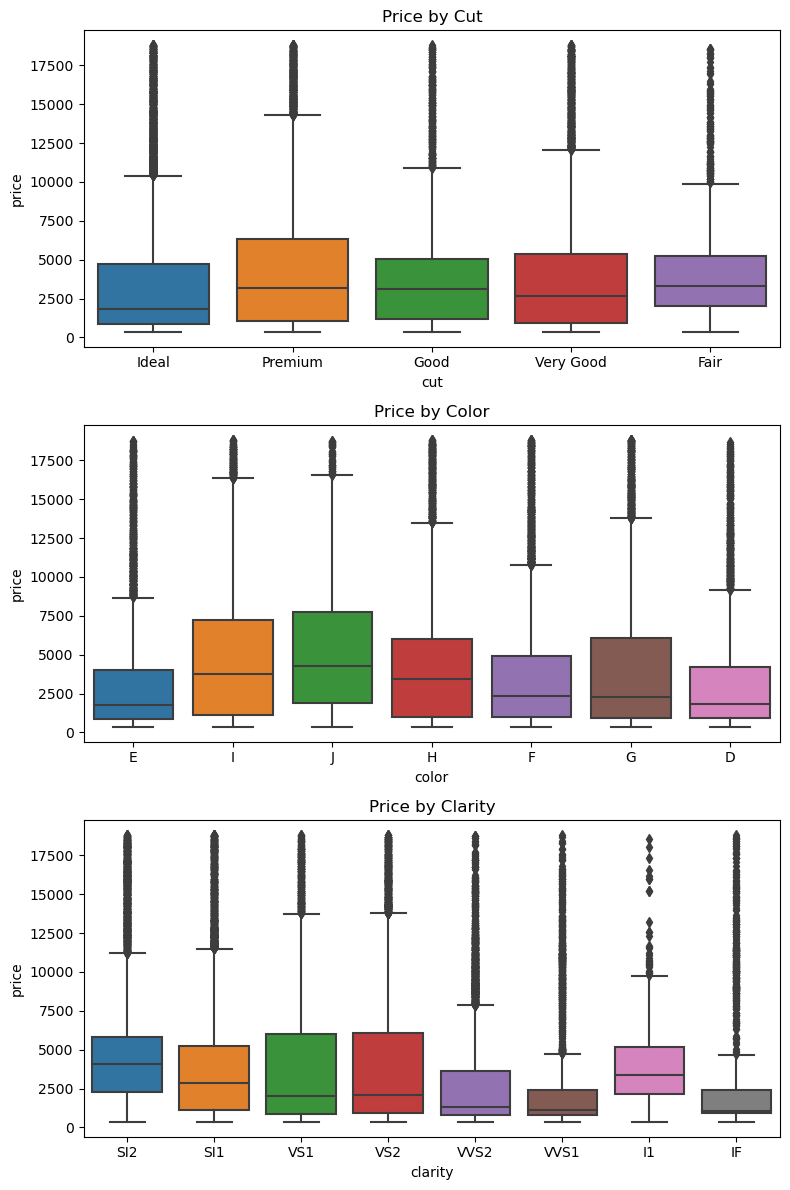

In [16]:
# outliers in the 3 categorical fields with respect to price

plt.figure(figsize=(8, 12))

plt.subplot(3,1,1)
sns.boxplot(x = 'cut', y = 'price', data = df)
plt.title('Price by Cut')
plt.subplot(3,1,2)
sns.boxplot(x = 'color', y = 'price', data = df)
plt.title('Price by Color')
plt.subplot(3,1,3)
sns.boxplot(x = 'clarity', y = 'price', data = df)
plt.title('Price by Clarity')

plt.tight_layout()
plt.show()

In [17]:
# viewing outliers in price column 

q1, q3 = df['price'].quantile([0.25, 0.75])
iqr = q1 - q1
outliers = df[(df['price'] < q1 - 1.5*iqr) | (df['price'] > q3 + 1.5*iqr)]
outliers.sort_values(by='price')

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
25732   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01
25733   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
25734   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
25735   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
25736   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16

[24992 rows x 10 columns]

***Next, let's view the list of top features that have high correlation coefficient. The corr() function calculates the Pearson'r correlation coefficients with respect to the 'price'.***

In [18]:
# correlation between price and numeric fields

corr_matrix = df.corr(numeric_only = True)
corr_matrix['price'].sort_values(ascending = False)

price    1.000000
carat    0.921804
x        0.884919
y        0.864393
z        0.860963
table    0.129848
depth   -0.012731
Name: price, dtype: float64

### Observations from EDA

- The dataset comprises 10 fields, with 6 columns of type float64, 1 column of type int64, and 3 columns of type object.
- The dataset contains a total of 50,000 records.
- There are no null values in any of the columns, indicating a complete dataset with no missing entries.
- The dataset contains 126 duplicate rows, which might need to be addressed to ensure data quality.
- The dataset includes categorical variables with the following unique values:
    - `cut`: 5 unique values.
    - `color`: 7 unique values.
    - `clarity`: 8 unique values.
- The distribution of diamond prices is right-skewed, indicating that there are a higher number of diamonds priced at the lower end with fewer diamonds at the higher price range.
- Outliers in the `price` column are noticeable when analyzed with respect to the `cut`, `color`, and `clarity` attributes. Using the Interquartile Range (IQR) method, it was determined that 24,992 rows are considered outliers.
- The price has a strong correlation with the following features:
    - `carat`
    - `x` (length)
    - `y` (width)
    - `z` (depth)
    - The correlation with the `table` and `depth` features is very weak, suggesting that these attributes have less impact on the diamond price compared to `carat` and dimensions.

## Data Cleaning & Preparation

In [19]:
# creating a copy of the dataframe to be used for machine learning

diamond_df = df.copy()

In [20]:
# dropping duplicates

diamond_df = diamond_df.drop_duplicates()

In [21]:
# checking remaining rows after dropping duplicates

diamond_df.shape

(49874, 10)

***There are less than 20 rows with missing values in columns `x, y and z` (out of almost 50 thousand). It's safe to drop these rows.***

In [22]:
# dropping all rows where 'z' column = 0

diamond_df = diamond_df[diamond_df['z'] != 0].reset_index(drop = True)

In [23]:
# checking remaining rows after dropping the above rows

diamond_df.shape

(49857, 10)

## Data Visualization

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


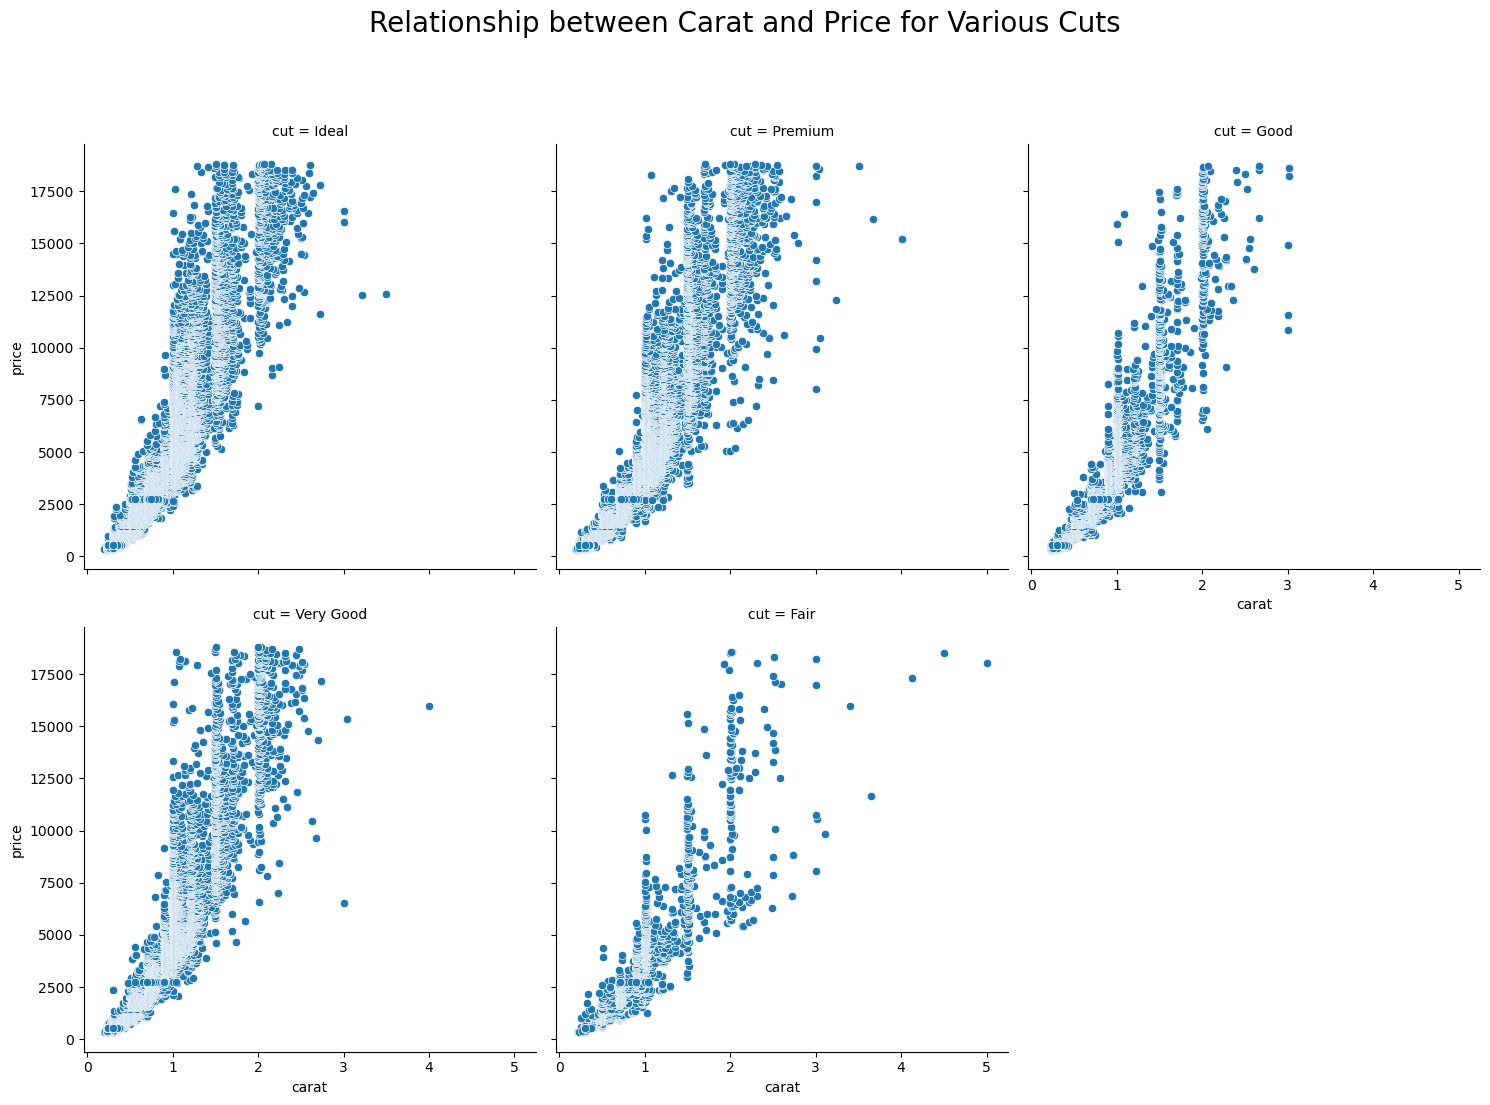

In [24]:
# relational plot

sns.relplot(kind='scatter', x='carat', y='price', col='cut', col_wrap=3, data = diamond_df)
plt.suptitle('Relationship between Carat and Price for Various Cuts', y=1.1, fontsize=20)
plt.show()

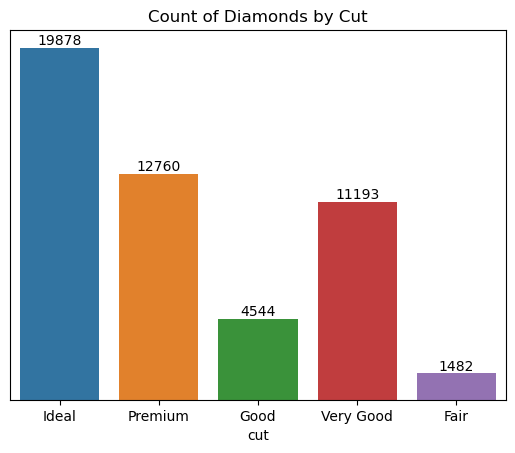

In [25]:
# count of Diamonds by Cut

cut = sns.countplot(x='cut', data=diamond_df)
plt.title('Count of Diamonds by Cut')
plt.ylabel('')
plt.yticks([])
cut.bar_label(cut.containers[0])
plt.show()

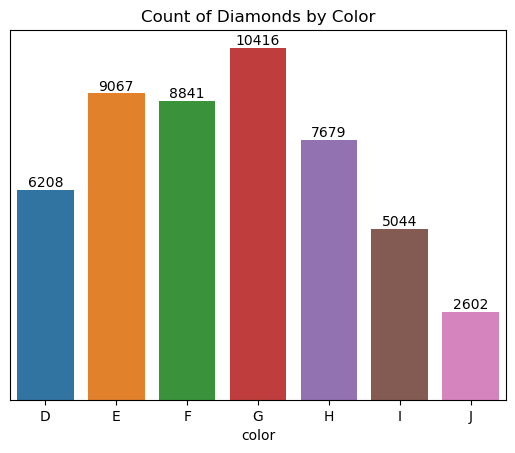

In [26]:
# count of Diamonds by Color

color = sns.countplot(x='color', order=['D', 'E', 'F', 'G', 'H', 'I', 'J'], data=diamond_df)
plt.title('Count of Diamonds by Color')
plt.ylabel('')
plt.yticks([])
color.bar_label(color.containers[0])
plt.show()

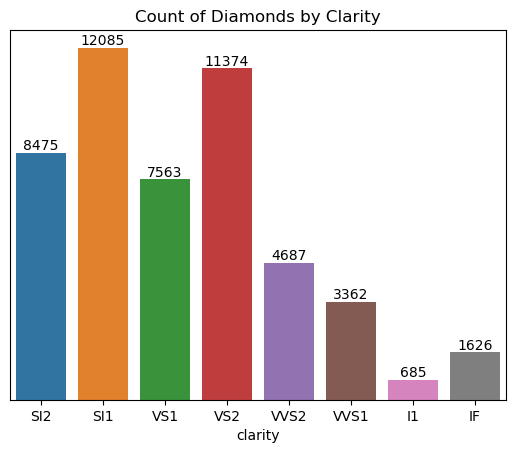

In [27]:
# count of Diamonds by clarity

clarity = sns.countplot(x='clarity', data=diamond_df)
plt.title('Count of Diamonds by Clarity')
plt.ylabel('')
plt.yticks([])
clarity.bar_label(clarity.containers[0])
plt.show()

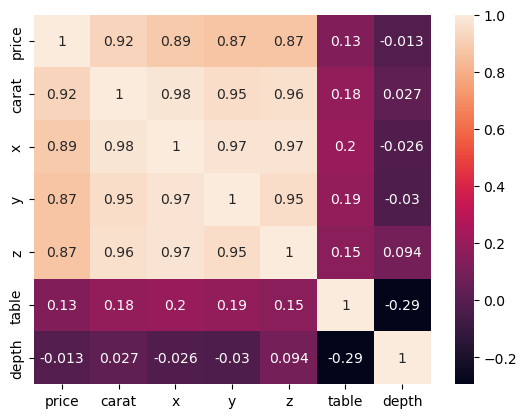

In [28]:
# visualizing the correlation between price and other numeric columns

sns.heatmap(diamond_df[['price', 'carat', 'x', 'y', 'z', 'table', 'depth']].corr(), annot=True)
plt.show()

# Price Prediction with Linear Regression

In [29]:
# Importing libraries for regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

***One-HotEncoding  
Three columns are categorical
One-HotEncoding creates binary columns for each category, where each column indicates the presence or absence of a category.***

In [30]:
# one-hot encoding

encoded_data = pd.get_dummies(diamond_df, columns=['cut','color','clarity'], dtype=int, drop_first=True)
encoded_data

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0       0.23   61.5   55.0    326  3.95  3.98  2.43         0          1   
1       0.21   59.8   61.0    326  3.89  3.84  2.31         0          0   
2       0.23   56.9   65.0    327  4.05  4.07  2.31         1          0   
3       0.29   62.4   58.0    334  4.20  4.23  2.63         0          0   
4       0.31   63.3   58.0    335  4.34  4.35  2.75         1          0   
...      ...    ...    ...    ...   ...   ...   ...       ...        ...   
49852   0.72   60.8   57.0   2757  5.75  5.76  3.50         0          1   
49853   0.72   63.1   55.0   2757  5.69  5.75  3.61         1          0   
49854   0.70   62.8   60.0   2757  5.66  5.68  3.56         0          0   
49855   0.86   61.0   58.0   2757  6.15  6.12  3.74         0          0   
49856   0.75   62.2   55.0   2757  5.83  5.87  3.64         0          1   

       cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0                0  ...        0        0        0           0            0   
1                1  ...        0        0        0           0            1   
2                0  ...        0        0        0           0            0   
3                1  ...        0        1        0           0            0   
4                0  ...        0        0        1           0            0   
...            ...  ...      ...      ...      ...         ...          ...   
49852            0  ...        0        0        0           0            1   
49853            0  ...        0        0        0           0            1   
49854            0  ...        0        0        0           0            1   
49855            1  ...        1        0        0           0            0   
49856            0  ...        0        0        0           0            0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0                1            0            0             0             0  
1                0            0            0             0             0  
2                0            1            0             0             0  
3                0            0            1             0             0  
4                1            0            0             0             0  
...            ...          ...          ...           ...           ...  
49852            0            0            0             0             0  
49853            0            0            0             0             0  
49854            0            0            0             0             0  
49855            1            0            0             0             0  
49856            1            0            0             0             0  

[49857 rows x 24 columns]

In [31]:
# independent variables

X = encoded_data.drop(columns=['price', 'table', 'depth'])

In [32]:
# dependent variable

y = encoded_data['price']

In [33]:
# splitting data into train dataset and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 50)

### Linear Regression

In [34]:
# Standardizing the feature variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# creating and fitting the linear regression model

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
# train score

lr_model.score(X_train_scaled, y_train)

0.9193190518109312

In [37]:
# test score

lr_model.score(X_test_scaled, y_test)

0.9218597214342023

In [38]:
# predict on test set

y_pred_lr = lr_model.predict(X_test_scaled)

In [39]:
# calculate and print performance metrics

mse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse_lr}\n")
print(f"R^2 Score: {r2_lr}\n")

Mean Squared Error: 1106.2387398881974

R^2 Score: 0.9218597214342023



In [40]:
# Convert predictions to DataFrame for plotting

y_test_df = pd.DataFrame(y_test.reset_index(drop=True))
y_pred_df = pd.DataFrame(y_pred_lr)

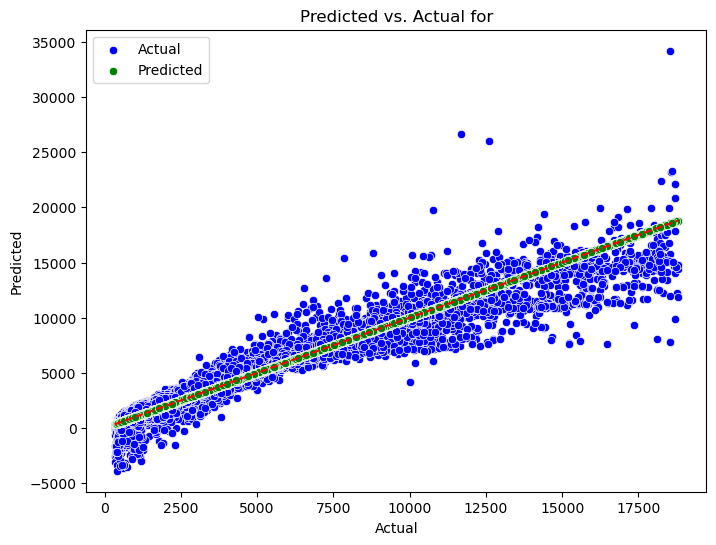

In [41]:
# Actual vs Predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_df['price'], y=y_pred_df[0], color='blue', label='Actual')
sns.scatterplot(x=y_test_df['price'], y=y_test_df['price'], color='green', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs. Actual for')
plt.legend()
plt.plot([y_test_df['price'].min(), y_test_df['price'].max()], [y_test_df['price'].min(), y_test_df['price'].max()], 'r--')
plt.show()

### Random Forest

In [42]:
# creating and fitting the RandomForest model

rf_model = RandomForestRegressor(n_estimators=10, random_state=50)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=50)

In [43]:
# train score

rf_model.score(X_train, y_train)

0.9949906353176433

In [44]:
# test score

rf_model.score(X_test, y_test)

0.9717172292364729

In [45]:
# predict on test set

y_pred_rf = rf_model.predict(X_test)

In [46]:
# calculate and print performance metrics


mse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}\n")
print(f"R^2 Score: {r2_rf}")

Mean Squared Error: 665.5372415356187

R^2 Score: 0.9717172292364729


In [47]:
# Convert predictions to DataFrame for plotting

y_pred_df2 = pd.DataFrame(y_pred_rf)

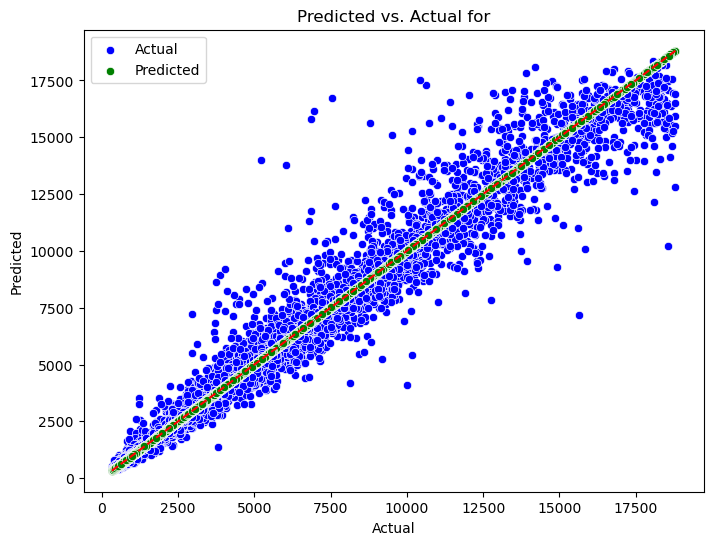

In [48]:
# Actual vs Predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_df['price'], y=y_pred_df2[0], color='blue', label='Actual')
sns.scatterplot(x=y_test_df['price'], y=y_test_df['price'], color='green', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs. Actual for')
plt.legend()
plt.plot([y_test_df['price'].min(), y_test_df['price'].max()], [y_test_df['price'].min(), y_test_df['price'].max()], 'r--')
plt.show()

## Model Performance

**Linear Regression:** 

*Train Score*: 0.9193  
*Test Score*: 0.9219  
*RMSE*: 1106.24  
*R² Score*: 0.9219  

**Random Forest:**  

*Train Score*: 0.9950  
*Test Score*: 0.9717  
*RMSE*: 665.54  
*R² Score*: 0.9717  

## Observations

**Training Performance:**

The Linear Regression model achieved a train score of 0.9193, indicating that it explains approximately 91.93% of the variance in the training data.
The Random Forest model significantly outperformed the Linear Regression model on the training set with a train score of 0.9950, capturing about 99.50% of the variance.  
  
**Testing Performance:**

On the test set, the Linear Regression model achieved an R² score of 0.9219 and an RMSE of 1106.24. This indicates that the model explains approximately 92.19% of the variance in the test data, with an average error of 1106.24 in price predictions.
The Random Forest model demonstrated superior performance on the test set with an R² score of 0.9717 and a significantly lower RMSE of 665.54, indicating it explains 97.17% of the variance with an average error of 665.54.

# Conclusion

**Model Selection:** Based on the evaluation metrics, the Random Forest model significantly outperforms the Linear Regression model in terms of both R² score and RMSE. The Random Forest model's ability to capture non-linear relationships and interactions between features allows it to make more accurate predictions.

**Overfitting:** While the Random Forest model performs exceptionally well, it shows a slight indication of overfitting due to the high train score relative to the test score. However, this is within acceptable limits given the substantial improvement in test performance compared to Linear Regression.

Feature Importance: Further analysis of feature importance within the Random Forest model could provide insights into which features most strongly influence diamond pricing, aiding in domain-specific decision-making and further model refinement.

*Future Work:*  
**Hyperparameter Tuning:** Further tuning of the Random Forest hyperparameters may yield even better performance.  
**Advanced Models:** Exploring additional models such as Gradient Boosting or XGBoost could provide performance improvements.  
**Feature Engineering:** Investigating additional features or interactions, such as polynomial features or domain-specific transformations, may enhance model performance.  
**Outlier Treatment:** Given the substantial number of outliers, a more robust approach to handling outliers could improve model stability and accuracy.  

***In conclusion, the Random Forest model provides a powerful tool for predicting diamond prices, offering significant improvements over a simple Linear Regression approach. Further refinements and explorations could enhance its performance and applicability in real-world scenarios.***